In [1]:
from models import get_model
from dataset import get_dataset, get_dataset_subset, get_dataloader
from core import prepare_datasets_for_online_attack
import numpy as np
import torch
import time
from train import train, inference


/home/hongyan/.conda/envs/privacy_meter_test/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-04-29 12:46:59.058672: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-29 12:46:59.677381: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu::/usr/lib/x86_64-linux-gnu:
2023-04-29 12:46:59.677465: W tensorflow/compiler/xla/stream_

In [3]:
np.random.seed(1022321)
batch_size = 256
model_name = "wrn28-2"
dataset = get_dataset("cifar10", "../data")
p_ratio = 0.5
dataset_size = 50000

Load data from ../data/cifar10.pkl
the whole dataset size: 60000


In [4]:
train_index = np.random.choice(np.arange(dataset_size), int(dataset_size * p_ratio), replace=False)

    
train_loader = get_dataloader(
    torch.utils.data.Subset(dataset, train_index),
    batch_size=batch_size,
    shuffle=True,
    
)
test_loader = get_dataloader(
    torch.utils.data.Subset(dataset, [i for i in range(50000, 60000)]),
    batch_size=10000,
    
)


In [20]:
from fastai.data.load import DataLoader
from fastai.learner import *
from fastai.optimizer import *
from fastai.metrics import *
from torch import nn
from fastai.vision.models.xresnet import *

data = DataLoader(train_loader, test_loader)
learn = Learner(data, resnet34, loss_func=nn.CrossEntropyLoss(), opt_func=Adam, metrics=accuracy)
# learn.fit_one_cycle(5, lr)
learn.lr_find()

AttributeError: 'function' object has no attribute 'lr_find'

2023-04-29 10:11:40.916495: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-29 10:11:41.023139: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu::/usr/lib/x86_64-linux-gnu:
2023-04-29 10:11:41.023158: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-29 10:11:41.548382: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: 

Results are stored in: ['existing_signals/population/']


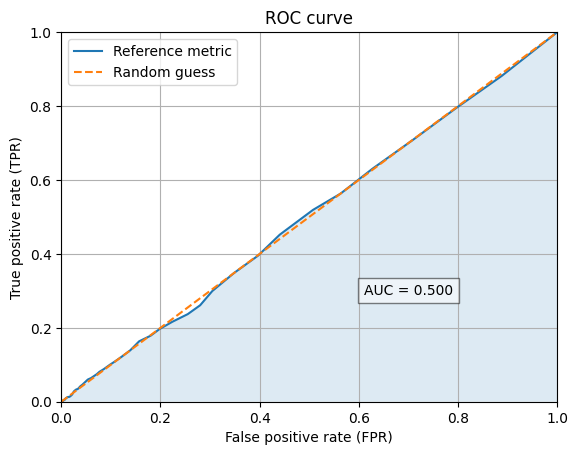

<Figure size 640x480 with 0 Axes>

Results are stored in: ['existing_signals/reference/']


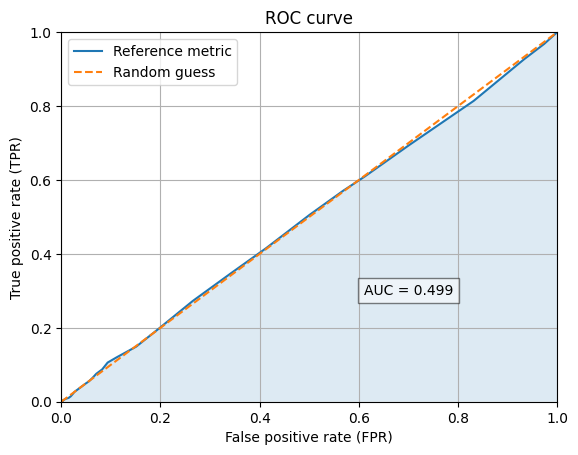

<Figure size 640x480 with 0 Axes>

(1, 1, 2000)

((205, 3), (205, 3), (1, 205, 3))

AUC 0.4857, Accuracy 0.7429, TPR@0.1%FPR of 0.0000


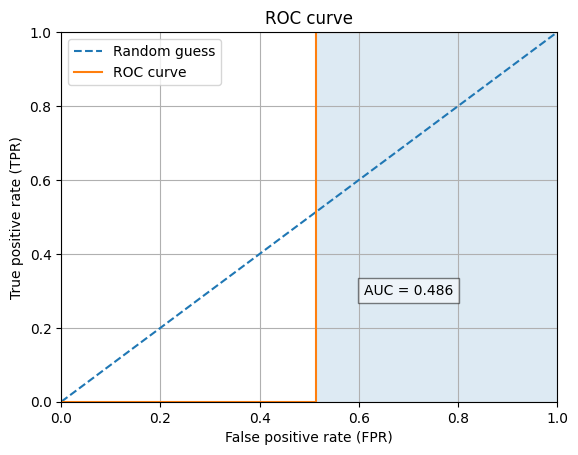